# **Final Project Task 4 - Census Modeling Clustering**

Requirements:

Load Data
- Use the preprocessed dataset from Task 1.

Prepare Features
- Feature Selection:
    - Select relevant numerical and categorical features.
    - Note: K-Means works best with numerical data.
- Data Preprocessing:
    - Be sure you have normalized numerical features (e.g., using MinMaxScaler or StandardScaler) and categorical features encoded properly (e.g., One-Hot Encoding or Ordinal Encoding).
    
Clustering Model Implementation
- Apply K-Means Clustering:
    - Experiment with different values of K (number of clusters).
    - Use the Elbow Method to determine the optimal number of clusters:
    - Use yellowbrick.cluster.KElbowVisualizer to find the best K.
    - Calculate the Silhouette Score to evaluate cluster separation.
- Alternative Clustering Approaches:
    - Experiment with Hierarchical Clustering.
    - Experiment with DBSCAN

Visualize & Interpret Clusters
- Dimensionality Reduction:
    - Apply PCA or t-SNE to reduce dimensions and visualize clusters in 2D.
- Cluster Analysis:
    - Plot the clusters in 2D space.
    - Identify key characteristics of each group.
    - Use only numerical variables to interpret the clusters.
- Example insights:
    - "Older individuals tend to work fewer hours per week."
    - "High-income individuals belong to a specific cluster."

Evaluate Cluster Quality
- Silhouette Score:
    - Compute the Silhouette Score to measure cluster compactness and separation. Higher values indicate better clustering results.
- Cluster Distribution:
    - Analyze how well the data points are distributed across clusters.


Deliverables:
- Notebook code with no errors.
- Visualizations & Analysis:
- Elbow method plot for K selection.
- 2D visualization of clusters.
- Summary of cluster characteristics.
- Cluster evaluation metrics (Silhouette Score).






In [1]:
import pandas as pd

In [2]:
data_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data"
columns = [
    "age", "workclass", "fnlwgt", "education", "education-num", "marital-status",
    "occupation", "relationship", "race", "sex", "capital-gain", "capital-loss",
    "hours-per-week", "native-country", "income"
]

data = pd.read_csv(data_url, header=None, names=columns, na_values=" ?", skipinitialspace=True)
data.sample(10)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
20797,41,?,129155,11th,7,Widowed,?,Other-relative,Black,Female,0,0,40,United-States,<=50K
22172,23,Private,140764,Assoc-voc,11,Never-married,Other-service,Own-child,White,Female,0,0,15,United-States,<=50K
9983,20,Private,186849,HS-grad,9,Never-married,Transport-moving,Other-relative,White,Male,0,0,40,United-States,<=50K
5808,76,?,211574,10th,6,Married-civ-spouse,?,Husband,White,Male,0,0,1,United-States,<=50K
27895,21,Private,209483,Some-college,10,Never-married,Sales,Own-child,White,Female,0,0,47,United-States,<=50K
28388,35,Local-gov,231180,HS-grad,9,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,45,United-States,<=50K
19632,39,Private,51264,11th,7,Divorced,Other-service,Own-child,White,Male,0,0,40,United-States,<=50K
20309,58,Federal-gov,497253,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,Black,Male,0,0,40,United-States,>50K
18712,34,Private,54850,Bachelors,13,Never-married,Exec-managerial,Not-in-family,White,Male,0,1590,50,United-States,<=50K
20140,47,Private,198769,Some-college,10,Never-married,Adm-clerical,Not-in-family,White,Female,0,0,40,United-States,>50K


In [3]:
# Example of using KElbowVisualizer

# from yellowbrick.cluster import KElbowVisualizer
# visualizer = KElbowVisualizer(clustering_model, k=(2, 10), metric='distortion', timings=False)
# visualizer.fit(preprocessed_data)
# visualizer.show()
# optimal_k = visualizer.elbow_value_


# Example of using PCA

# from sklearn.decomposition import PCA
# clusters = clustering_model.fit_predict(preprocessed_data)
# pca = PCA(n_components=2)
# pca_result = pca.fit_transform(preprocessed_data)
# pca1 = pca_result[:, 0]
# pca2 = pca_result[:, 1]
# # Visualizing Clusters
# plt.figure(figsize=(10, 6))
# sns.scatterplot(x=pca1, y=pca2, hue=clusters, palette='tab10', data=data, alpha=0.7)
# plt.title(f'PCA Projection of Clusters (K={num_clusters})')
# plt.xlabel('Principal Component 1')
# plt.ylabel('Principal Component 2')
# plt.legend(title='Cluster')
# plt.show()

#Aducem datele preprocesate si importam toate librariile necesare:

In [4]:
data = pd.read_csv("cleaned_data_final.csv")
data.shape

(32537, 45)

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler


import warnings
warnings.filterwarnings("ignore")

In [6]:
data.head()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,sex_encodat,income_encodat,workclass_Local-gov,workclass_Never-worked,...,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife,race_Asian-Pac-Islander,race_Black,race_Other,race_White,age_group_adult,age_group_senior
0,39,77516,13,2174,0,40.0,1,0,False,False,...,False,False,False,False,False,False,False,True,True,False
1,50,83311,13,0,0,32.5,1,0,False,False,...,False,False,False,False,False,False,False,True,True,False
2,38,215646,9,0,0,40.0,1,0,False,False,...,False,False,False,False,False,False,False,True,True,False
3,53,234721,7,0,0,40.0,1,0,False,False,...,False,False,False,False,False,True,False,False,True,False
4,28,338409,13,0,0,40.0,0,0,False,False,...,False,False,False,True,False,True,False,False,False,False


#Se eliminate unele coloane categorice si se verifica tipurile de date:

In [7]:
drop_cols = []

for col in ["income", "income_encodat"]:
    if col in data.columns:
        drop_cols.append(col)

X = data.drop(columns=drop_cols)
X.shape

X.dtypes.value_counts()

bool       37
int64       6
float64     1
Name: count, dtype: int64

#Se standardizeaza datele inainte de aplicarea KMeans:

In [8]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#Determinarea numarului de clustere prin Elbow Method:

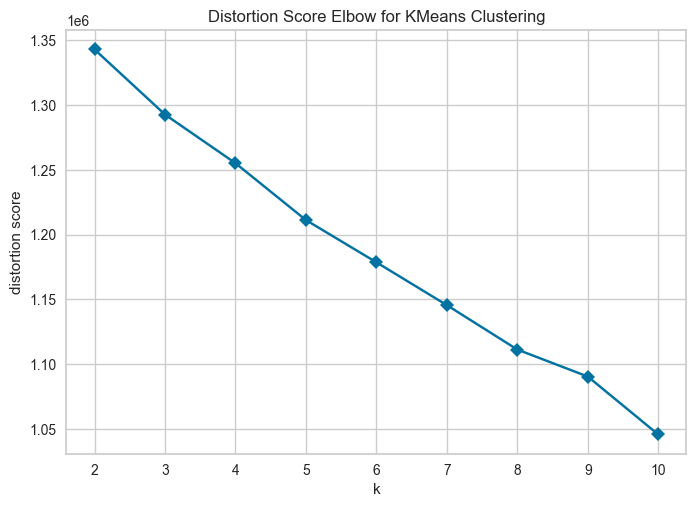

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
model = KMeans(random_state=42, n_init=10)

visualizer = KElbowVisualizer(
    model,
    k=(2, 11),
    metric="distortion",
    timings=False,
    force_model=True ###pentru a rezolva o eroare de genul 'YellowbrickTypeError: The supplied model is not a clustering estimator; try a classifier or regression score visualizer instead!
)

visualizer.fit(X_scaled)
visualizer.show()


#Interpretare: cea mai abrupta scadere apare in cadrul valorii 3, deci trei clustere ar fi un numar acceptabil, conform graficului

#Alegerea numarului final de clustere:

In [10]:
k_final = 3

#Antrenarea modelului:

In [11]:
kmeans = KMeans(n_clusters=k_final, random_state=42, n_init=10)
kmeans_labels = kmeans.fit_predict(X_scaled)

#Evaluarea modelului prin intermediul scorului Silhouette:

In [36]:
sil_score_kmeans = silhouette_score(X_scaled, kmeans_labels)
sil_score_kmeans

0.08496009371783361

-> conform rezultatului obtinut, configurarea clusterelor obtinute nu are un scor foarte bun, cel mai probabil clusterele avand o suprapunere destul de ridicata intre ele, cu delimitarea slaba a valorilor.

#Vizualizarea clusterelor:

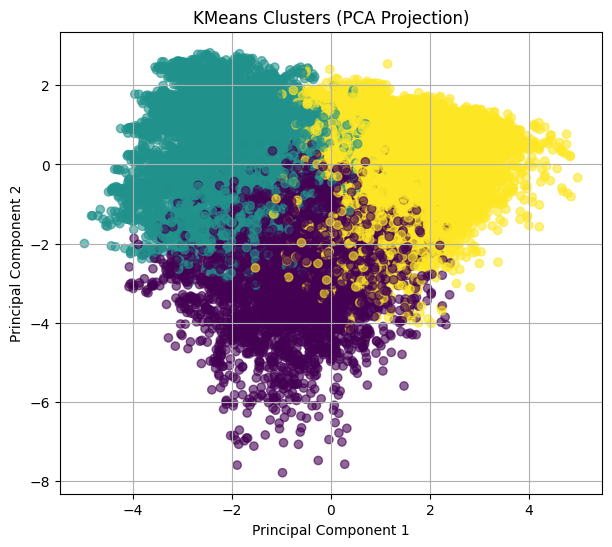

In [13]:
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(7,6))
plt.scatter(X_pca[:,0], X_pca[:,1], c=kmeans_labels, alpha=0.6)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("KMeans Clusters (PCA Projection)")
plt.grid(True)
plt.show()


#Interpretare: asemeni scorului silhouette obtinut anterior, este o suprapunere foarte ridicata a celor trei clustere.

#Interpretarea clusterelor numerice:

In [14]:
numeric_cols = X.select_dtypes(include=["int64","float64"]).columns

cluster_profile = X[numeric_cols].copy()
cluster_profile["cluster"] = kmeans_labels

cluster_profile.groupby("cluster").mean()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,sex_encodat
cluster,,,,,,,
0,45.482713,187720.811732,9.612486,475.193675,51.929051,39.809356,0.230706
1,27.160269,196239.197121,9.954990,328.614299,50.877543,39.313868,0.573321
2,43.391220,186363.614337,10.343200,1796.244286,124.618022,42.963844,0.898776


#Clusterul 0: sexul tinde catre a fi feminin, orele lucrate sunt aproape 40 de ore, prezinta cel mai scazut nivel de educatie dintre cele 3, desi diferenta este aproape nesemnificativa; prezinta un capital-gain mediu si un capital-loss relativ scazut; varsta este cea mai ridicata dintre toate clusterele, de aproximativ 45 de ani. 

#Clusterul 1: sexul e aproximativ la aceleasi sanse de a fi femeiesc sau barbatesc; prezinta varsta cea mai mica, de aproximativ 27 de ani; nivelul educational este intre cele doua clustere; capital-gain este insa cel mai scazut, dar si capital-loss; lucreaza cele mai putine ore pe saptamana, aproape de 39 de ore, dar cu diferente foarte mici fata de restul clusterelor.

#Clusterul 2: mai multe sanse sa fie barbati decat femei, cel mai in varsta cluster, cu cel mai mare capital-gain, dar si capital-loss mai mare; prezinta nivelul cel mai crescut de educatie, iar varsta este aproximativ 43 de ani. 

#Alte metode de clustering: 

In [43]:
#Agglomerative Clustering:

unique_labels = np.unique(agg_labels)
n_clusters = len(unique_labels)

if n_clusters >= 2:
    agg_silhouette = silhouette_score(X_scaled, agg_labels)
else:
    agg_silhouette = np.nan

print("Agglomerative silhouette:", agg_silhouette)


Agglomerative silhouette: 0.056177228910226126


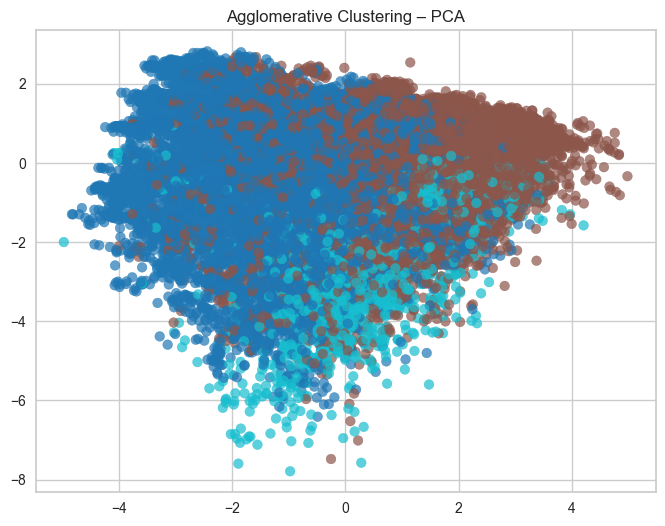

In [44]:
plt.figure(figsize=(8,6))
plt.scatter(X_pca[:,0], X_pca[:,1], c=agg_labels, cmap="tab10", alpha=0.7)
plt.title("Agglomerative Clustering – PCA")
plt.grid(True)
plt.show()

#Interpretare Agglomerative Clustering: Clusterele sunt mult mai difuze, delimitarea este mult mai putin clara decat in cazul analizei KMeans. Scorul Silhouette obtinut este foarte scazut, sub 0.10, deci avem confirmarea unei separari foarte slabe a clusterelor. 

In [ ]:
#DBSCAN Clustering:

dbscan = DBSCAN(eps=0.8, min_samples=10)
dbscan_labels = dbscan.fit_predict(X_scaled)

set(dbscan_labels)

{np.int64(-1),
 np.int64(0),
 np.int64(1),
 np.int64(2),
 np.int64(3),
 np.int64(4),
 np.int64(5),
 np.int64(6),
 np.int64(7),
 np.int64(8),
 np.int64(9),
 np.int64(10),
 np.int64(11),
 np.int64(12),
 np.int64(13),
 np.int64(14),
 np.int64(15),
 np.int64(16),
 np.int64(17),
 np.int64(18),
 np.int64(19),
 np.int64(20),
 np.int64(21),
 np.int64(22),
 np.int64(23),
 np.int64(24),
 np.int64(25),
 np.int64(26),
 np.int64(27),
 np.int64(28),
 np.int64(29),
 np.int64(30),
 np.int64(31),
 np.int64(32),
 np.int64(33),
 np.int64(34),
 np.int64(35),
 np.int64(36),
 np.int64(37),
 np.int64(38),
 np.int64(39),
 np.int64(40),
 np.int64(41),
 np.int64(42),
 np.int64(43),
 np.int64(44),
 np.int64(45),
 np.int64(46),
 np.int64(47),
 np.int64(48),
 np.int64(49),
 np.int64(50),
 np.int64(51),
 np.int64(52),
 np.int64(53),
 np.int64(54),
 np.int64(55),
 np.int64(56),
 np.int64(57),
 np.int64(58),
 np.int64(59),
 np.int64(60),
 np.int64(61),
 np.int64(62),
 np.int64(63),
 np.int64(64),
 np.int64(65),
 np.i

#Interpretare DBSCAN: Rezultatul analizei DBSCAN arata un numar foarte ridicat de clustere mici, pana la 174; sunt prezenti si outlieri, adica observatii in afara clusterelor (eticheta -1). Asadar, DBSCAN nu este o metoda utila pentru setul de date curent.

#Concluzii & descrierea clusterelor:

In urma analizelor au fost identificate 3 clusere, prin metoda kmeans, fiind cea mai optima metoda pentru setul de date curent. Primul cluster, clusterul 0, pare sa contina angajati cu venituri bune, de aproximativ 45 de ani, cel mai probabil femei; par a fi observatii din clasa socio-economica upper-middle class, fiind compuse din multe femei cu educatie superioara.

Clusterul 1 pare a contine angajatii la inceput de cariera sau proaspeti absolventi cu venituri mai scazute, putine experiente, atat barbati, cat si femei. 

Clusterul 2 pare a apartine unei clase socio-economice mai privilegiate, cu cel mai ridicat nivel de educatie si cele mai mari venituri, sansele fiind mai mari ca respondentii sa fie barbati de varsta mijlocie. 

Concluzionand, toate cele trei clustere prezinta o variabila comuna, anume, un nivel mai ridicat de educatie, acesta fiind corelat si cu castiguri capitale mai mari.